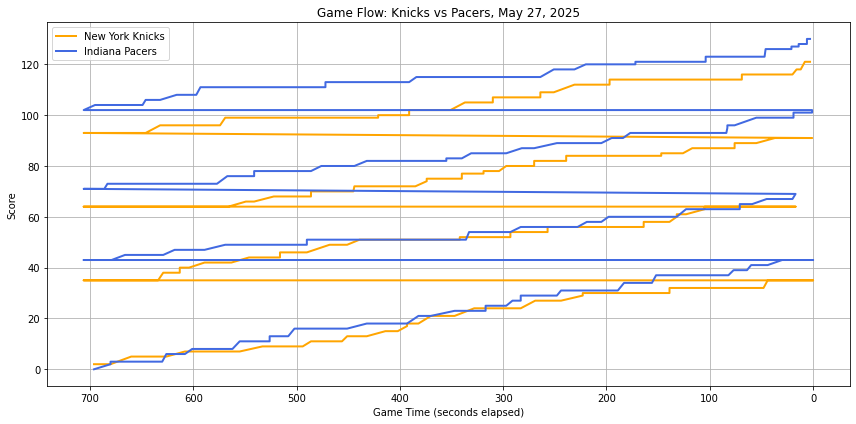

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load the HTML file
with open("Example_game.html", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "lxml")

# Locate the play-by-play table
pbp_table = soup.find("table", id="pbp")

# Initialize data structures
times = []
nyk_scores = []
ind_scores = []

# Starting scores
nyk_score = 0
ind_score = 0

# Loop through play-by-play rows
for row in pbp_table.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == 6:
        time_cell = cells[0].text.strip()
        score_cell = cells[3].text.strip()

        # If score updated, extract numeric values
        if score_cell and '-' in score_cell:
            nyk_score, ind_score = map(int, score_cell.split('-'))

            # Append time (convert to game clock seconds) and current scores
            # Example: "11:36.0" → 12*60 - 11*60 - 36 = 24 seconds elapsed
            min_sec = time_cell.split(":")
            if len(min_sec) == 2:
                minutes, seconds = map(float, min_sec)
                game_clock = (12 * 60) - (minutes * 60 + seconds)
            else:
                game_clock = None  # For jump ball or non-time rows

            if game_clock is not None:
                times.append(game_clock)
                nyk_scores.append(nyk_score)
                ind_scores.append(ind_score)

# Reverse time axis so it runs from 0 to end of game
times = [12*60 - t for t in times]

# Plot game flow
plt.figure(figsize=(12, 6))
plt.plot(times, nyk_scores, label="New York Knicks", color="orange", linewidth=2)
plt.plot(times, ind_scores, label="Indiana Pacers", color="royalblue", linewidth=2)

plt.xlabel("Game Time (seconds elapsed)")
plt.ylabel("Score")
plt.title("Game Flow: Knicks vs Pacers, May 27, 2025")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Show time counting down
plt.tight_layout()
plt.show()